<center><img src="redpopcorn.jpg"></center>

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry.

You work for a production company that specializes in nostalgic styles. You want to do some research on movies released in the 1990's. You'll delve into Netflix data and perform exploratory data analysis to better understand this awesome movie decade!

You have been supplied with the dataset `netflix_data.csv`, along with the following table detailing the column names and descriptions. Feel free to experiment further after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

Purpose: Provided a CSV file containing Netflix data
CSV file containing the following columns: "Title", "Genre", "Rating", "Release Year", "Duration", and "Description"
I will perform an EDA (Exploratory Data Analysis) on the dataset to understand its structure and contents.


In [1]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv")

In [2]:
#Some initial exploration of the dataset
# use head, but have first row be 1, not 0
netflix_df.index += 1
print(netflix_df.head(10))

print()
print()


print("Let's see how many rows and columns we have in the dataset")

# Check the shape of the DataFrame
print(f"The dataset contains {netflix_df.shape[0]} rows and {netflix_df.shape[1]} columns.")



   show_id     type  title           director  \
1       s2    Movie   7:19  Jorge Michel Grau   
2       s3    Movie  23:59       Gilbert Chan   
3       s4    Movie      9        Shane Acker   
4       s5    Movie     21     Robert Luketic   
5       s6  TV Show     46        Serdar Akar   
6       s7    Movie    122    Yasir Al Yasiri   
7       s8    Movie    187     Kevin Reynolds   
8       s9    Movie    706      Shravan Kumar   
9      s10    Movie   1920       Vikram Bhatt   
10     s11    Movie   1922       Zak Hilditch   

                                                 cast        country  \
1   Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2   Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3   Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4   Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   
5   Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...         Turkey   
6   Amina Khalil, Ahmed Dawo

Next up, lets take a look for any data that may need cleaning, i.e., finding any nulls, missing, or redudant data



In [9]:
#We know that we have 4812 rows. Lets see how many unique titles we have

# Check the number of unique titles in conjction with showID, in case there are duplicates or sequels with similar names
print(f"The dataset contains {netflix_df['show_id'].nunique()} unique titles.")

print("Netflix provided us with a dataset that contains 4812 unique rows. There are no duplicates or sequels with same showID.")
print()
print()
#any null values in the dataset?
print("Let's check for any null values in the dataset") 
print(netflix_df.isnull().sum())
print("\nIt seems there are no null values in the dataset")

#any duplicates in the dataset?
print("Let's check for any duplicates in the dataset")  
print(f"The dataset contains {netflix_df.duplicated().sum()} duplicates.")
print()

print ("Any NA values in the dataset?")
print(netflix_df.isna().sum())
print("\nIt seems there are no NA values in the dataset")

The dataset contains 4812 unique titles.
Netflix provided us with a dataset that contains 4812 unique rows. There are no duplicates or sequels with same showID.


Let's check for any null values in the dataset
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
duration        0
description     0
genre           0
dtype: int64

It seems there are no null values in the dataset
Let's check for any duplicates in the dataset
The dataset contains 0 duplicates.

Any NA values in the dataset?
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
duration        0
description     0
genre           0
dtype: int64

It seems there are no NA values in the dataset


Text(-3, 10, 'Most common run time: 94')

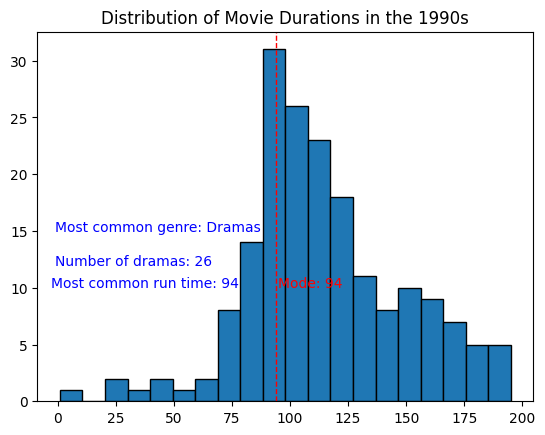

In [5]:
# most common duration of movies released in the 1990s
netflix_1990 = netflix_df[(netflix_df['release_year'] >= 1990) & (netflix_df['release_year'] <= 1999)]
netflix_1990
duration = netflix_1990['duration'].mode() [0]
duration

#create a histogram of the duration of movies released in the 1990s
plt.hist(netflix_1990['duration'], bins=20, edgecolor='black')
plt.title('Distribution of Movie Durations in the 1990s')

#color the mode in red
plt.axvline(duration, color='red', linestyle='dashed', linewidth=1)
plt.text(duration + 1, 10, f'Mode: {duration}', color='red')


#now lets create a dataframe of the most common year of release that had a running time of 90 minutes
netflix_90 = netflix_df[netflix_df['duration'] == 90]


#find mode of of genre for movies with 90 minutes duration from netflix_90
genre = netflix_90['genre'].mode()[0]

#count number of dramas with 90 minutes duration, put it below the histogram
plt.text(-1, 15, f'Most common genre: {genre}', color='blue')
drama_count = netflix_90[netflix_90['genre'] == genre].shape[0]
plt.text(-1, 12, f'Number of dramas: {drama_count}', color='blue') 
plt.text(-3, 10, f'Most common run time: {duration}', color='blue') 


In [ ]:
#Some other questions I'd like to answer
#1. Is there a most common director in the dataset?
#2. Is there a most common actor in the dataset?    
#3. Is there a most common country in the dataset?

#Lets start with answering the first question
#find the most common director in the dataset
most_common_director = netflix_df['director'].mode()[0]
print(f"The most common director in the dataset is: {most_common_director}")
#how many movies did they direct?
most_common_director_count = netflix_df[netflix_df['director'] == most_common_director].shape[0]
print(f"The most common director directed {most_common_director_count} movies in the dataset")
print()


The most common director in the dataset is: Raúl Campos, Jan Suter
The most common director directed 18 movies in the dataset



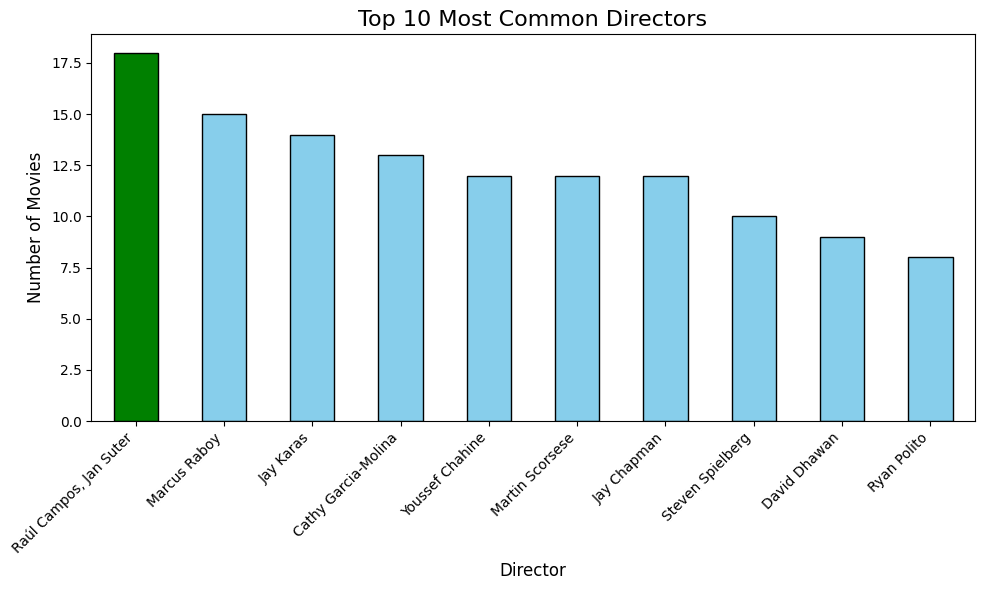

In [13]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Count the number of movies directed by each director
director_counts = netflix_df['director'].value_counts().head(10)  # Top 10 directors

# Get the most common director
most_common_director = netflix_df['director'].mode()[0]

# Assign colors: unique color for the most common director, default for others
colors = ['green' if director == most_common_director else 'skyblue' for director in director_counts.index]

# Create a bar chart for the top directors
plt.figure(figsize=(10, 6))
director_counts.plot(kind='bar', color=colors, edgecolor='black')
plt.title('Top 10 Most Common Directors', fontsize=16)
plt.xlabel('Director', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [18]:
#now lets answer the second question
#find the most common actor in the dataset
most_common_actor = netflix_df['cast'].mode()[0]
print(f"The most common actor in the dataset is: {most_common_actor}")

#how many movies did they act in?
most_common_actor_count = netflix_df[netflix_df['cast'] == most_common_actor].shape[0]
print(f"The most common actor acted in {most_common_actor_count} movies in the dataset")
print()

#create a visualization of the most movies acted in by the most common actor
#most_common_actor_movies = netflix_df[netflix_df['cast'] == most_common_actor]
#print(f"The movies acted in by {most_common_actor} are: {most_common_actor_movies['title'].values}")

The most common actor in the dataset is: Samuel West
The most common actor acted in 10 movies in the dataset



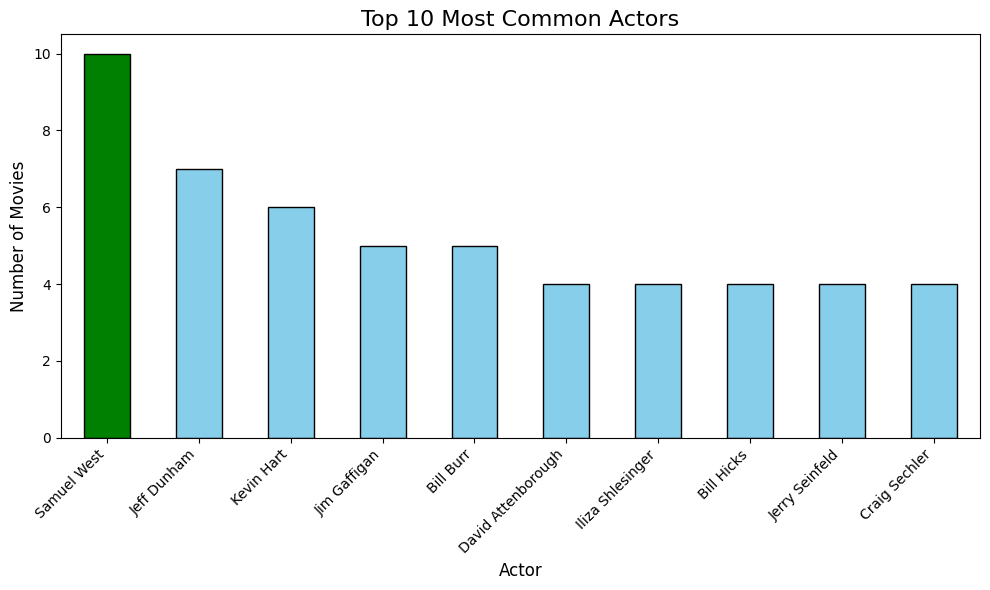

In [21]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Count the number of movies directed by each director
cast_counts = netflix_df['cast'].value_counts().head(10)  # Top 10 directors

# Get the most common director
most_common_actor = netflix_df['cast'].mode()[0]

# Assign colors: unique color for the most common director, default for others
colors = ['green' if cast == most_common_actor else 'skyblue' for cast in cast_counts.index]

# Create a bar chart for the top directors
plt.figure(figsize=(10, 6))
cast_counts.plot(kind='bar', color=colors, edgecolor='black')
plt.title('Top 10 Most Common Actors', fontsize=16)
plt.xlabel('Actor', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

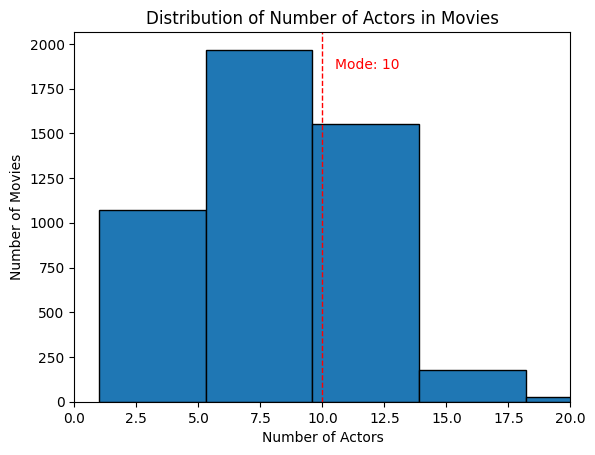

In [33]:
# Calculate the number of actors in each movie
netflix_df['num_actors'] = netflix_df['cast'].str.split(',').str.len()

# Find the most common number of actors
mostFrequentNumOfActors = netflix_df['num_actors'].mode()[0]

# Plot a histogram of the number of actors in movies
plt.hist(netflix_df['num_actors'], bins=10, edgecolor='black')
plt.title('Distribution of Number of Actors in Movies')
plt.xlabel('Number of Actors')
plt.ylabel('Number of Movies')
plt.xlim(0, 20)

# Highlight the mode in red
plt.axvline(mostFrequentNumOfActors, color='red', linestyle='dashed', linewidth=1)
plt.text(mostFrequentNumOfActors + 0.5, plt.ylim()[1] * 0.9, f'Mode: {mostFrequentNumOfActors}', color='red')

plt.show()